In [1]:
import matplotlib.pyplot as plt
import numpy as np
from stretchdyn.atoms_bonds import Atom, Bond, Molecule

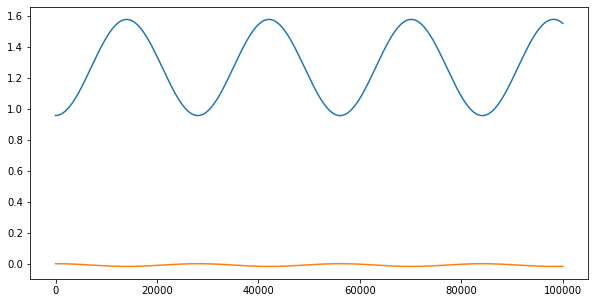

In [6]:
r_e_ab = 1.27455
k_ab = 4.88e-8
cl = Atom(mass_amu=35, symbol="Cl", pos=np.zeros(3), vel=np.zeros(3), prev_accel=np.zeros(3))
h = Atom(mass_amu=1, symbol="H", pos=np.array([r_e_ab * 0.75, 0.0, 0.0]), vel=np.zeros(3), prev_accel=np.zeros(3))
bond_cl_h = Bond(atom_a=cl, atom_b=h, r_e_ab=r_e_ab, k_ab=k_ab)
bond_h_cl = Bond(atom_a=h, atom_b=cl, r_e_ab=r_e_ab, k_ab=k_ab)
cl.bonds["h"] = bond_h_cl
h.bonds["cl"] = bond_cl_h
molecule = Molecule(atoms={"h": h, "cl": cl})
xs = range(100000)
for _ in xs:
    molecule.update_all_atoms()
h_pos_history_x = [pos[0] for pos in h.pos_history]
cl_pos_history_x = [pos[0] for pos in cl.pos_history]
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(10, 5))
ax.plot(xs, h_pos_history_x)
ax.plot(xs, cl_pos_history_x)